In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms import community

In [ ]:
# Baca data
data = pd.read_csv("https://github.com/Adkurrr/Community-detection-using-Girvan-Newman-Algorithm/blob/main/hasil_preprocessing_data.csv?raw=true", delimiter=';')

#mengganti nama kolom atribut dengan "data_pemilu"
data.rename(columns={'full_text,cleasing,Tokenization and Case Folfing,Filtering/stopword removal,stemming data': 'data_pemilu'}, inplace=True)

df = data['data_pemilu']
#data.head()

In [ ]:
# Membuat graf berarah dari data_pemilu
G = nx.DiGraph()

# Menambahkan node yaitu jumlah data dan edge yaitu mention pada postingan tiap node
for i, row in df.iteritems():
    words = row.split()
    G.add_node(i)
    edges = [(i, j) for j in range(len(words)) if words[j] in ["ganjar", "prabowo", "anies"]]
    G.add_edges_from(edges)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19964\1223365687.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, row in df.iteritems():


In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(num_nodes)
print(num_edges)

213
130


In [ ]:
# Menerapkan Girvan-Newman pada graf
comp = community.girvan_newman(G)

In [ ]:
node_groups = []
for com in next(comp):
  node_groups.append(list(com))

print(node_groups)

[[0, 1, 4, 5, 6, 7, 10, 11, 16, 19, 22, 23, 26, 27, 29, 31, 38, 41, 43, 44, 48, 50, 51, 54, 56, 57, 58, 60, 61, 62, 63, 64, 69, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 89, 91, 93, 95, 97, 99, 100, 103, 104, 106, 108, 110, 111, 112, 113, 114, 115, 117, 119, 123, 124, 125, 126, 127, 128, 129, 130, 135, 136, 137, 146, 150, 151, 152, 157, 159, 162, 163, 164, 168, 169, 170, 172, 177, 180, 193, 203], [2, 194, 36, 3, 166, 8, 138, 45, 15, 47, 211, 147, 153], [9], [12], [13], [14], [65, 17], [18], [20], [21, 118], [24], [25], [131, 144, 210, 149, 28], [158, 30], [32], [33], [34], [35], [37], [39], [40, 121], [42], [46], [49], [52, 189, 86], [53], [143, 66, 198, 55], [59], [67], [68], [70], [78], [79], [83], [84, 133], [85, 102], [87], [88], [90], [92], [94], [96], [98, 132], [101], [105, 156], [107], [109], [116], [120], [122], [134], [139], [140], [141], [142], [145], [148], [154], [155], [160], [161], [165], [167], [171], [173], [174], [175], [176], [178], [179], [181], [182], [183], [184], [

In [ ]:
#cluster dengan kata kunci ganjar, prabowo, dan anies

color_map = []
for node in G:
  if node in node_groups[0]:
    color_map.append("red")
  elif node in node_groups[1]:
    color_map.append("blue")
  else:
    color_map.append("green")


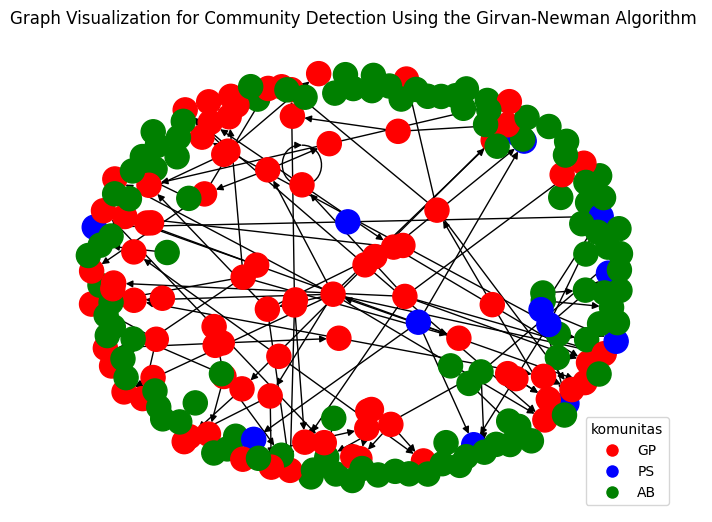

In [ ]:
# Plot the graph with node colors
pos = nx.spring_layout(G)  # You can use a different layout if needed
nx.draw(G, pos, node_color=color_map, with_labels=False, font_weight='bold')

# Display the plot
target_nodes = {"GP": "red", "PS": "blue", "AB": "green"}
legend_labels = {color: node for node, color in target_nodes.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in target_nodes.items()]
plt.legend(handles=legend_handles, title="komunitas", labels=list(legend_labels.values()), loc='lower right')

plt.title("Graph Visualization for Community Detection Using the Girvan-Newman Algorithm ")
plt.show()

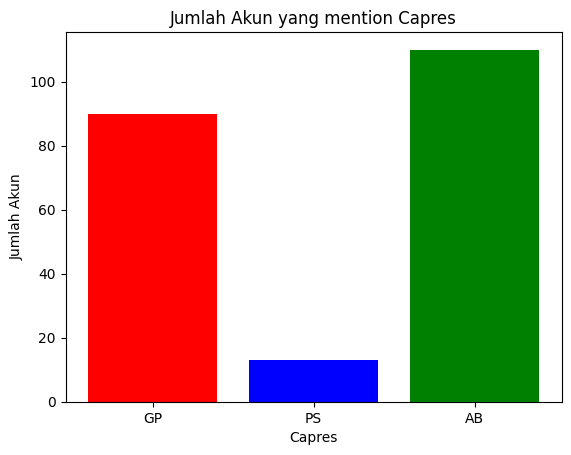

In [ ]:
# Count the number of supporters for each candidate
supporter_counts = {candidate: color_map.count(color) for candidate, color in target_nodes.items()}

# Visualize supporter counts using a bar chart
plt.figure()
plt.bar(supporter_counts.keys(), supporter_counts.values(), color=list(target_nodes.values()))
plt.xlabel('Capres')
plt.ylabel('Jumlah Akun')
plt.title('Jumlah Akun yang mention Capres')
plt.show()

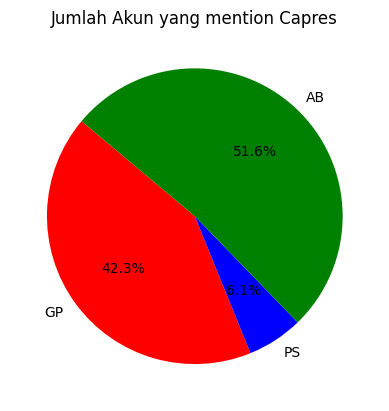

In [ ]:
# Visualize supporter counts using a pie chart with percentages
plt.figure()
plt.pie(supporter_counts.values(), labels=supporter_counts.keys(), autopct='%1.1f%%', colors=list(target_nodes.values()), startangle=140)
plt.title('Jumlah Akun yang mention Capres')
plt.show()